Today, I want to share a Python code snippet that tackles missing data in a comprehensive way. This is a critical step in any data science project as missing data can skew results and lead to inaccurate conclusions. In this exercise, I use the Video Games Sales dataset from the end of 2016.

The code starts by loading the dataset and checking for missing values in each column. It also prints out the data types of each column for a thorough understanding of the data structure.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('/kaggle/input/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv')


# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check data types
print("\nData types of each column:")
print(df.dtypes)

Missing values in each column:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Data types of each column:
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object


Upon examining the "Video Games Sales" dataset, we noticed substantial missing values in key columns like 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', and 'Developer'. Ignoring these missing entries may lead to skewed insights. Therefore, we're opting for an imputation strategy.

We'll use the K-Nearest Neighbors (KNN) imputation technique, which estimates missing values based on their 'k' nearest neighbors in the feature space. This method is beneficial due to its ability to handle both categorical and continuous data.

Before imputation, we'll perform one-hot encoding to convert categorical data into a numerical format, enabling the KNN imputation to process it.

This strategy allows us to leverage the full potential of the dataset without losing valuable information, while acknowledging that imputed data is an estimate and may not perfectly represent the true values.

Next, we'll implement these steps to prepare our dataset for further analysis.

Next, I temporarily drop the 'Name' column, as it's not suitable for one-hot encoding or imputation. Then, I proceed with one-hot encoding for all the categorical columns. The resulting DataFrame contains numerical representations for each category.

In [2]:
# Drop the 'Name' column temporarily
df_temp = df.drop('Name', axis=1)

# Encode categorical columns using one-hot encoding
categorical_columns = df_temp.select_dtypes(include=['object']).columns
encoder = OneHotEncoder()
df_encoded = pd.DataFrame(encoder.fit_transform(df_temp[categorical_columns]).toarray(), columns=encoder.get_feature_names_out(categorical_columns))


The next step is to concatenate these encoded columns with the numerical columns. Then, I use K-nearest neighbors (KNN) imputation to fill the missing values. This method calculates the missing value based on the 'k' closest values in the feature space.

In [3]:
# Concatenate the encoded columns with the numerical columns
df_concat = pd.concat([df_encoded, df_temp.select_dtypes(exclude=['object'])], axis=1)

# Perform KNN imputation
imputer = KNNImputer(n_neighbors=5)
df_impute = pd.DataFrame(imputer.fit_transform(df_concat), columns=df_concat.columns)


The 'Name' column is then added back to the imputed DataFrame. Subsequently, the program checks for missing values after imputation, and identifies and removes any duplicate rows. The cleaned data is saved to a new CSV file.

In [4]:
# Add back the 'Name' column to the imputed DataFrame
df_impute['Name'] = df['Name']

# Check for missing values after imputation
print("\nMissing values in each column after imputation:")
print(df_impute.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df_impute.duplicated().sum())

# Remove duplicate rows
df_impute = df_impute.drop_duplicates()

# Save the cleaned data to a new CSV file
df_impute.to_csv('imputed_data.csv', index=False)


Missing values in each column after imputation:
Platform_2600    0
Platform_3DO     0
Platform_3DS     0
Platform_DC      0
Platform_DS      0
                ..
Global_Sales     0
Critic_Score     0
Critic_Count     0
User_Count       0
Name             2
Length: 2439, dtype: int64

Number of duplicate rows:
0


Lastly, a heatmap is created to visualize the imputed values.

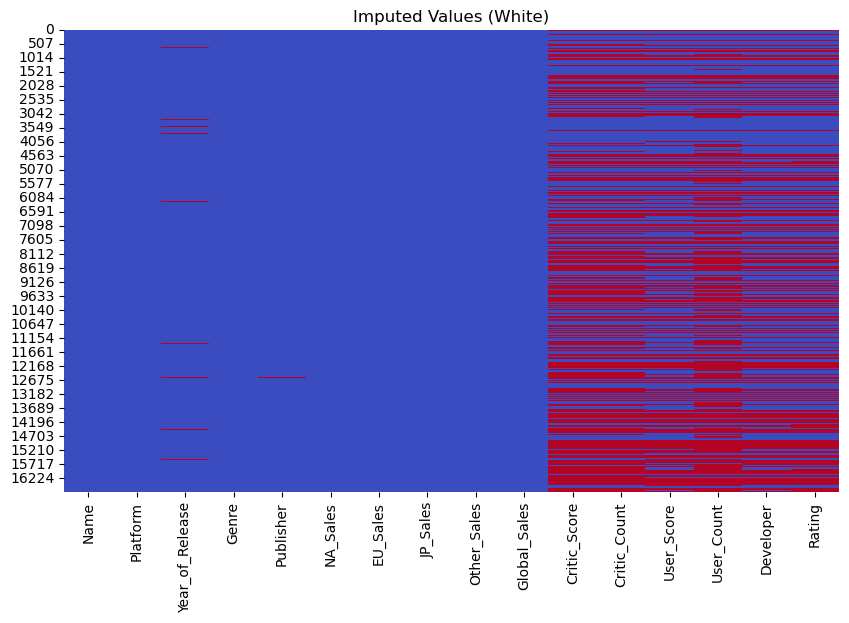

In [5]:
# Create a mask to identify imputed values
mask = df.isnull().astype(int)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mask, cmap='coolwarm', cbar=False)
plt.title('Imputed Values (White)')

# Show the plot
plt.show() 

Following our imputation strategy, we've successfully addressed the missing values in our dataset, as confirmed by a final check:

After applying the KNN imputation and one-hot encoding, our heatmap visualization shows no missing values in the features originally populated with considerable gaps. This successful imputation results in a more comprehensive dataset, beneficial for subsequent analyses or model training.

However, we still see two missing entries in the 'Name' column. This discrepancy was expected as we intentionally avoided imputing this particular column, due to its nature as a unique identifier for the games.

It's essential to reiterate that imputed values are estimates and may not precisely reflect the original, unknown values. Nevertheless, these estimates allow us to make full use of the dataset without dismissing potentially valuable data.

With the missing data now filled, we are ready to dive deeper into exploratory data analysis and model building.